# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка и изучение данных. 

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')  # чтение csv-файла и замена разделителя данных

In [4]:
data.info() #изучаю общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head(10) # вывожу на экран первые 10 строчек датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


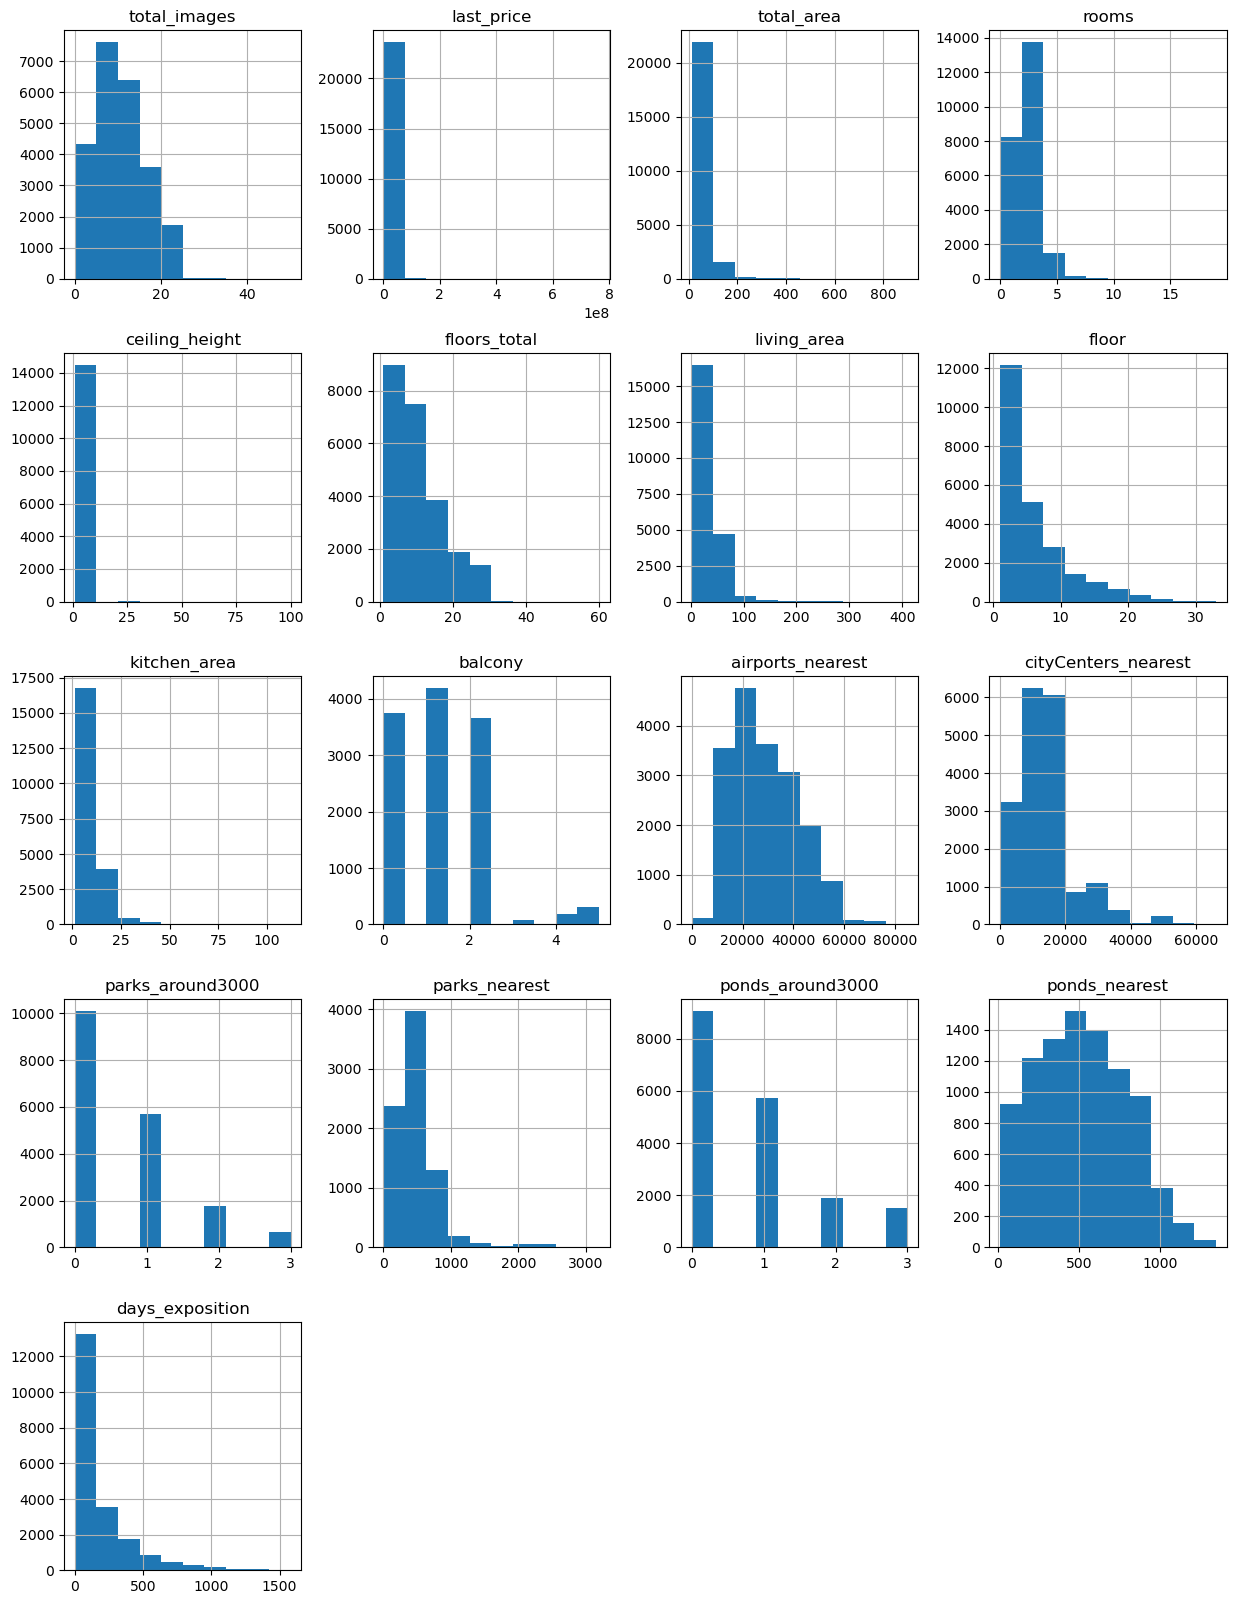

In [7]:
data.hist(figsize=(15, 20)); # смотрю общую гистограмму

Судя по виду некоторых гистограмм в данных есть выбросы.

### Предобработка данных

Посмотрим количество пропущенных значений в каждом столбце

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датафрейме достаточно много пропусков, для начала стоит проанализировать природу этих пропусков и изучить их влияние на результаты анализа данных
<br> **ceiling_height**           9195 - высота потолков пропущена практически в 40% объявлений, оставлю Null, заполнение средними значениями может исказить далнейший анализ
<br> **floors_total**               86 - этажность дома, несущественное количество пропусков, строки удалю, так как в дальнейшем предстоит работа с этим столбцом
<br> **living_area**             1903 - жилая площадь, оставлю Null, заполнение средними значениями может исказить далнейший анализ
<br> **is_apartment**            20924 - не заполнены практически 80% значений, скорее всего объекты с незаполненными ячейками не являются апартаментами, заполню False
<br> **kitchen_area**             2278 - пропущено около 10% значений, оставлю Null, заполнение средними значениями может исказить далнейший анализ, еще возможно данные квартиры являются студиями
<br> **balcony**                 11519 - примерно половина значений не заполнена, возможно у объектов нет балконов.
<br> **locality_name**              49 - лучше всего очистить датафрейм от объектов без названия населенного пункта, так как они скорее всего будут вносить ошибки в данные.
<br> **airports_nearest**         5542 - скорее всего это областные населенные пункты достаточно удаленные от аэропорта
<br> **cityCenters_nearest**     5519 - скорее всего это небольшие населенные пункты
<br> **parks_around3000**         5518 - скорее всего это небольшие населенные пункты, либо нет парка в радиусе 3000 метров
<br> **parks_nearest**           15620 - скорее всего это небольшие населенные пункты, либо парк рядом отсутствует
<br> **ponds_around3000**         5518 - нет прудов в радиусе 3000 м
<br> **ponds_nearest**           14589 - нет близко расположенных прудов
<br> **days_exposition**          3181 - возможно объявление не было опубликовано, хотя не очень понятно как тогда появились просмотры

In [9]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True) # переименую столбец по питоновски

Сперва удалю строки, которые из-за пропусков потеряли смысл, это строки без наименования населенного пункта и общей этажности. 

In [10]:
data=data.dropna(subset=['locality_name']).reset_index(drop=True) # удаляем строки без наименования населенного пункта

In [11]:
data=data.dropna(subset=['floors_total']).reset_index(drop=True) # удаляем строки без указания общей этажности

In [12]:
data.isna().sum() # проверяю что строки с пропусками в названии населенных пунктов удалены

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [13]:
data['locality_name'].unique() # поиск неявных дубликатов в названии населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е') # уберем расхождения из-за несовпадения регистров, расхождения е/ё

In [15]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок мурино', 'мурино')  # поселок Мурино получил статус города в 2019, переименую

In [16]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('городской поселок', 'поселок городского типа')  # приведем в порядок наименования типов населенных пунктов

In [17]:
data['locality_name'].value_counts() #Посчитаем количество уникальных значений после обработок

санкт-петербург                     15651
мурино                                586
поселок шушары                        439
всеволожск                            398
пушкин                                369
                                    ...  
садовое товарищество новая ропша        1
деревня курковицы                       1
поселок левашово                        1
поселок севастьяново                    1
поселок дзержинского                    1
Name: locality_name, Length: 322, dtype: int64

In [18]:
data.duplicated().sum() #Проверяем количество явных дубликатов

0

**Заполню пропуски в столбцах**

In [19]:
data['balcony'] = data['balcony'].fillna(0) # в столбце где не указано количество балконов ставлю ноль

In [20]:
data['is_apartment'] = data['is_apartment'].fillna('False') # в столбце где не указан тип анартаменты ставлю False

In [21]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # в столбце где не указано количество парков ставлю ноль

**Требуется изменение данных для следующих столбцов:**
 <br>  last_price           - int целое число, копейки не используются
 <br>  first_day_exposition - date в столбце указана дата, переводим в нужный формат
 <br>  floors_total          -int этаж может быть только целым
 <br>  balcony              - int количество балконов целое число
 <br>  parks_around3000     - int количество парков целое число
 <br>  ponds_around3000     - int количество водоемов целое число
 <br>  days_exposition      - int дни экспозиции используются как целые числа

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data = data.astype({ "last_price": "int64", "floors_total": "int64", "balcony": "int64"}, errors='ignore')
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], errors='coerce')).astype('Int64')
data['ponds_around3000'] = np.floor(pd.to_numeric(data['ponds_around3000'], errors='coerce')).astype('int64')
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64') # поменяла форматы

In [23]:
data.info() # проверяю изменение формата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Проверю различные выбросы в данных**

In [24]:
data.describe() # вывожу статистику

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<br> **total_images** - данные выглядят достоверно, редко публикуют более 20 фотографий, есть объекты без фото. Чаще публикуют от 7 до 15 фото

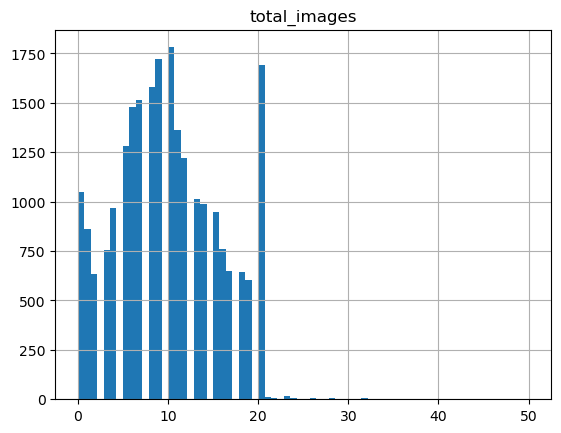

In [25]:
data.hist('total_images', bins=70, range=(0, 50)); # строю гистограмму

<br> **last_price** - очень большой разброс данных, маловероятно что стоимость жилья будет менее 50 тысяч даже в деревне, вариантов стоимостью свыше 50 млн так же не много и на их стоимость как правило больше всего оказывают влияния факторы, которые мы в данной таблице не учитываем, скорее всего это эксклюзивное жилье с дорогим ремонтом и мебелью в исторических районах, либо просто опечатка при вводе данных. Основная стоимость жилья сосредоточена в диапазонах от 2 до 8 млн. рублей.

In [26]:
print('Квартир до 100 тысяч:', data.query('last_price < 100000')['last_price'].count())
print('Квартир дороже 50 млн:', data.query('last_price > 50000000')['last_price'].count())
print('Квартир дороже 100 млн:', data.query('last_price > 100000000')['last_price'].count())
print('Квартир дороже 200 млн:', data.query('last_price > 200000000')['last_price'].count()) # посмотрю как распределяется стоимость

Квартир до 100 тысяч: 1
Квартир дороже 50 млн: 131
Квартир дороже 100 млн: 37
Квартир дороже 200 млн: 9


In [27]:
data.query('last_price < 100000') # изучаю инфо по объекту, что бы понять реальная цена или с большой долей вероятности ошибка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8750,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8


данный вариант явно попал сюда по ошибке

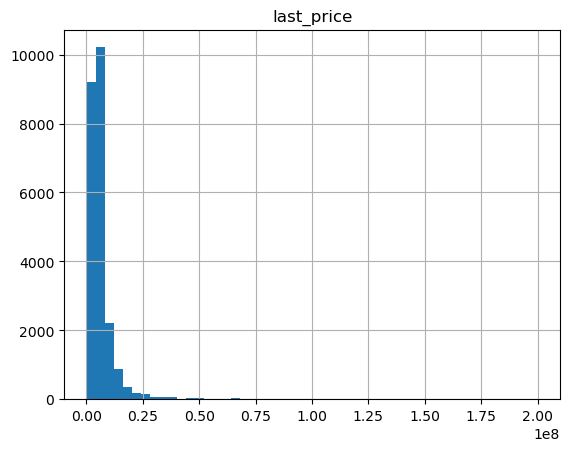

In [28]:
data.hist('last_price', bins=50, range=(100000, 200000000)); # строю гистограмму

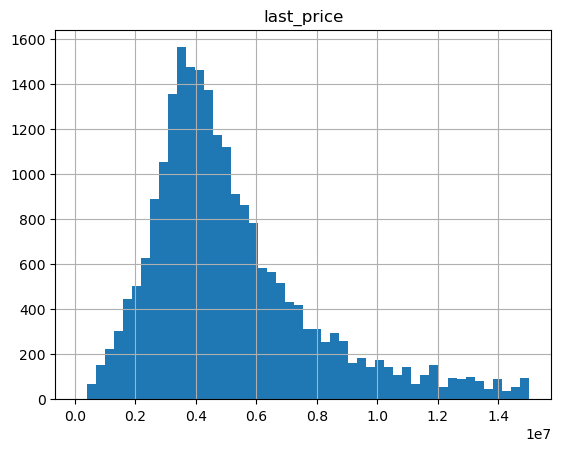

In [29]:
data.hist('last_price', bins=50, range=(100000, 15000000)); # строю гистограмму без аномальных значений и смотрю распределение

<br> **total_area** - минимальная площадь жилья 12 метров, в принципе недвижимость с такой площадью встречается в продаже, оставлю вариант, так как здесь сложно определится с нижней границей. верхний вариант 900 квадратных метров, скорее всего это элитное жилье и встречается не часто, учитывая разницу между 75 процентилью и максимумом можно ограничится макимально площадью в 300 квадратов и проанализировать. В основном на рынке встречаются варианты от 25 до 100 квадратных метров общей площади.

In [30]:
print('Квартир до 20 квадратов:', data.query('total_area < 20')['total_area'].count())
print('Квартир более 200 квадратов:', data.query('total_area > 200')['total_area'].count())
print('Квартир более 300 квадратов:', data.query('total_area > 300')['total_area'].count())
print('Квартир более 400 квадратов:', data.query('total_area > 400')['total_area'].count()) # считаю количество квартир с аномально большими площадями

Квартир до 20 квадратов: 27
Квартир более 200 квадратов: 226
Квартир более 300 квадратов: 61
Квартир более 400 квадратов: 23


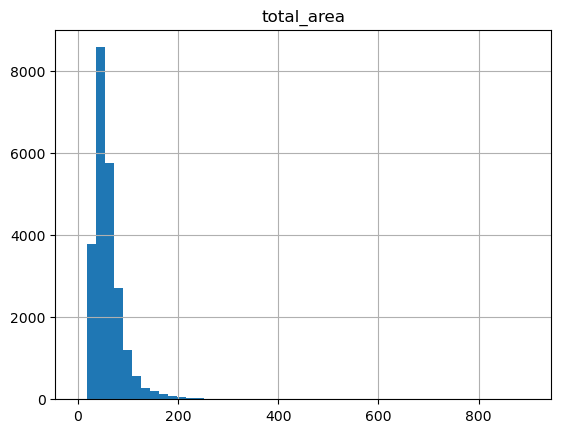

In [31]:
data.hist('total_area', bins=50, range=(0, 900)); # строю гистограмму

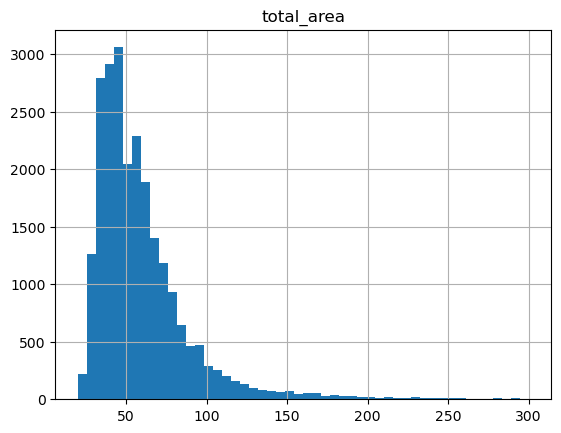

In [32]:
data.hist('total_area', bins=50, range=(20, 300)); # строю гистограмму без аномальных значений и смотрю распределение

<br> **rooms** здесь есть нулевые значения, нужно проверить, возможно это студии или апартаменты или свободная планировка. Есть вариант с 19 комнатами, так же вполне реальный. На обработанном графике хорошо видно что на рынке больше всего 1, 2 и 3 комнатных квартир с большим отрывом от остальных вариантов.

In [33]:
print('Квартир с 0 комнат:', data.query('rooms == 0')['rooms'].count())
print('Квартир с 1 комнатой:', data.query('rooms == 1')['rooms'].count())
print('Квартир с 2 комнатами:', data.query('rooms == 2')['rooms'].count())
print('Квартир с 3 и 4 комнатами:', data.query('3 <= rooms <= 4')['rooms'].count())
print('Квартир с более 6 комнатами:', data.query('rooms > 6')['rooms'].count()) # смотрю какие есть варианты и сколько 
 # можно было и pivot_table собрать

Квартир с 0 комнат: 194
Квартир с 1 комнатой: 8004
Квартир с 2 комнатами: 7897
Квартир с 3 и 4 комнатами: 6951
Квартир с более 6 комнатами: 90


In [37]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,мурино,NaN,NaN,<NA>,NaN,0,NaN,181
347,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня кудрово,NaN,NaN,<NA>,NaN,0,NaN,45
438,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64
505,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,поселок парголово,53115.0,19292.0,0,NaN,1,593.0,430
605,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,поселок шушары,NaN,NaN,<NA>,NaN,0,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,санкт-петербург,11405.0,13222.0,0,NaN,1,623.0,14
23310,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,мурино,NaN,NaN,<NA>,NaN,0,NaN,4
23422,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,санкт-петербург,18090.0,17092.0,0,NaN,2,112.0,31
23459,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,никольское,NaN,NaN,<NA>,NaN,0,NaN,82


In [41]:
print('Квартиры с 0 комнат и студии:',data.query('rooms == 0 & studio == True')['rooms'].count()) 
# проверим условие для квартир без комнат, являются ли они студиами
print('Квартиры с 0 комнат и апартаменты:',data.query('rooms == 0 & is_apartment == True')['rooms'].count()) 
# проверим условие для квартир без комнат, являются ли они апартаментами
print('Квартиры с 0 комнат и свободная планировка:',data.query('rooms == 0 & open_plan == True')['rooms'].count())
# проверим условие для квартир без комнат, являются ли они свободной планировкой

Квартиры с 0 комнат и студии: 135
Квартиры с 0 комнат и апартаменты: 0
Квартиры с 0 комнат и свободная планировка: 59


In [42]:
print('Квартиры с 0 комнат не студия и не свободная планировка:',data.query('rooms == 0 & open_plan==False & studio==False')['rooms'].count())
# проверим условие для квартир без комнат, есть ли варианты если квартира не студия и не апартаменты

Квартиры с 0 комнат не студия и не свободная планировка: 0


Действительно с 0 комнат нет квартир если это не студия и не свободная планировка, значения студия, апартаменты и свободная планировка могут быть верны для одного и того же объекта

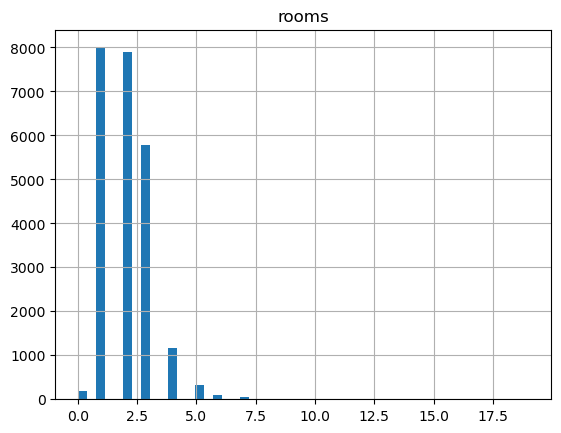

In [44]:
data.hist('rooms', bins=50, range=(0, 19)); # строю гистограмму

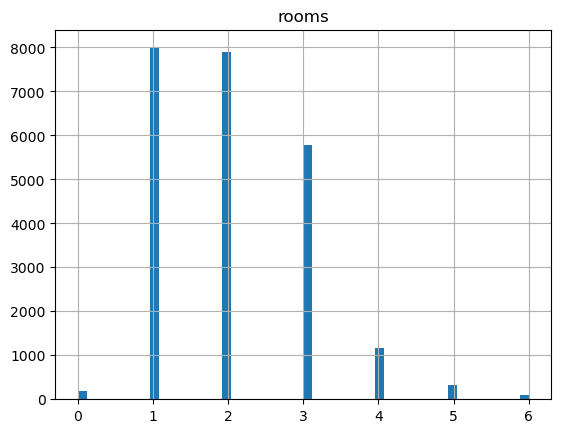

In [46]:
data.hist('rooms', bins=50, range=(0, 6)); # строю гистограмму для наиболее вероятных вариантов

<br> **ceiling_height** есть минимальное значение в 1 метр и максимально в 100 метров, необходимо очистить данные от нереальных значений. Более всего на рынке квартир с потолками от 2,5 до 3 метров.

In [47]:
print('Квартир с потолками от 4 до 25м:', data.query('ceiling_height > 4 and ceiling_height < 25')['ceiling_height'].count()) 
# проверяю явные выбросы, которые буду исключать
print('Квартир с потолками до 2,5м:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
# проверяю явные выбросы, которые буду исключать
print('Квартир с потолками от 25м до 40м:',data.query('ceiling_height >= 25 and ceiling_height <= 40')['ceiling_height'].count())
# проверяю ошибки, которые можно поправить
print('Квартир с потолками от 40м: ', data.query('ceiling_height > 40')['ceiling_height'].count())
# проверяю явные выбросы, которые буду исключать

Квартир с потолками от 4 до 25м: 55
Квартир с потолками до 2,5м: 73
Квартир с потолками от 25м до 40м: 19
Квартир с потолками от 40м:  1


19 квартир с потолками от 25 до 40 метров скорее всего опечатка, стоит поправить размерность. Квартир с потолками менее 2,5 метров быть не должно, ну и свыше 40 так же сложно объяснить, поэтому эти данные просто удалю из датасета

In [48]:
data.drop(index=data.query('4 < ceiling_height < 25').index,inplace=True) # удаляю квартиры с потолками от 4 до 25 метров
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True) # удаляю квартиры с потолками до 2,5 метров

data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 40), 'ceiling_height']=data['ceiling_height']/10 # заменяю значения с ошибкой

data.drop(index=data.query('ceiling_height > 40').index,inplace=True) # удаляю квартиры с потолками более 40 метров

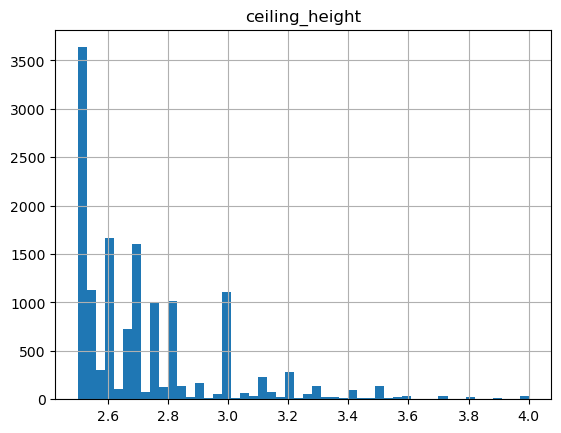

In [50]:
data.hist('ceiling_height', bins=50, range=(2.5, 4)); # строю гистограмму по очищеным данным

<br> **floors_total** есть одноэтажные дома, это нормально. Максимальная этажность 60, но на сегодняшний день максимальная этажность в Санкт-Петербурге - 37 этажей для жилого дома, поэтому 60 это скорее всего опечатка, данные с этажами выше 37 стоит убрать из данных. Очень много квартир продаются в 5 и 9 этажных домах, что вполне соответствует визуально наблюдаемой застройке городов.

In [51]:
print('Квартир в 37+ этажных домах : ',data.query('floors_total > 37')['floors_total'].count()) # проверяю есть ли указанная этажность выше известного на сегодняшний день максимально высокого жилого дома

Квартир в 37+ этажных домах :  2


In [52]:
data.drop(index=data.query('floors_total > 37').index,inplace=True) # удаляю квартиры в домах выше 37 этажей

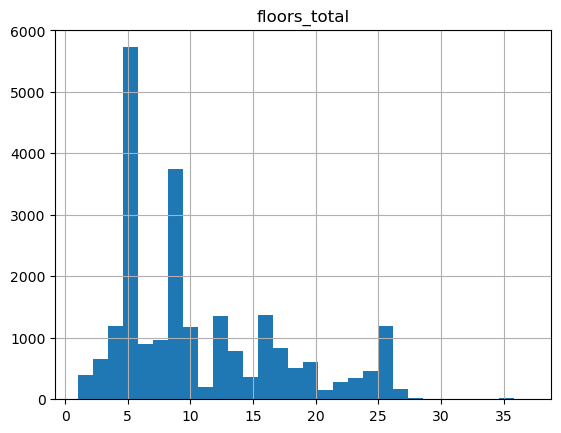

In [53]:
data.hist('floors_total', bins=30, range=(1, 37)); # строю гистограмму

<br> **living_area** - минимальная жилая площадь 2 метра не выглядит реалистично в России, стоит убрать квартиры с жилой площадью менее 8 метров их всего 10 в выборке, квартир с площадью более 250 квадратных метров 16, можно убрать без ущерба выборке. 

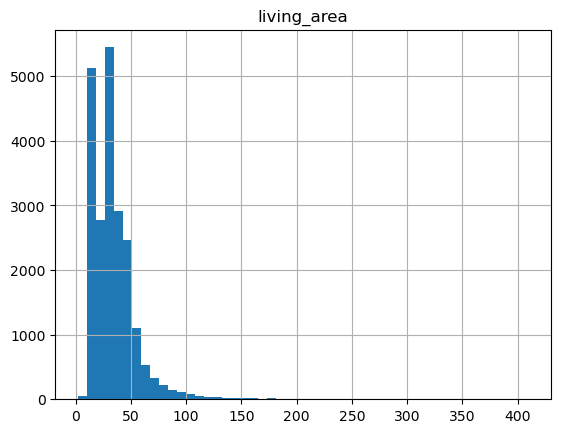

In [54]:
data.hist('living_area', bins=50, range=(2, 410)); # строю гистограмму

In [55]:
print('Квартир с жилой площадью меньше 8 метров:', data.query('living_area <= 8')['living_area'].count()) # определяюсь с нижней границей данных по размеру жилой площади
print('Квартир с жилой площадью более 100 метров:', data.query('living_area >= 100')['living_area'].count()) # определяюсь с верхней границей данных по размеру жилой площади
print('Квартир с жилой площадью более 200 метров:', data.query('living_area >= 200')['living_area'].count()) # определяюсь с верхней границей данных по размеру жилой площади

Квартир с жилой площадью меньше 8 метров: 10
Квартир с жилой площадью более 100 метров: 350
Квартир с жилой площадью более 200 метров: 30


In [56]:
data.drop(index=data.query('living_area <= 8').index,inplace=True) # удаляю квартиры с жилой площадью менее 8 метров
data.drop(index=data.query('living_area >= 200').index,inplace=True)  # удаляю квартиры с жилой площадью более 200 метров

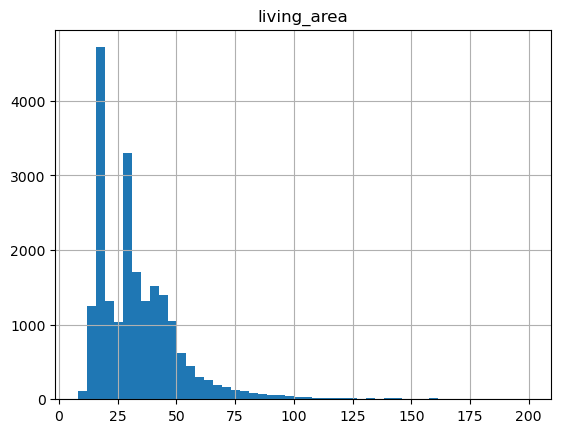

In [58]:
data.hist('living_area', bins=50, range=(8, 200)); # строю гистограмму

в данных наблюдается интересный отрицательны экстремум для жилих площадей от 21 до 26 метров, видимо это связано с типовыми планировками застройки

<br> **floor** данные выглядят достоверно, оставляю. Основная масса продоваемой жилой недвижимости сосредоточена на 1-5 этажах

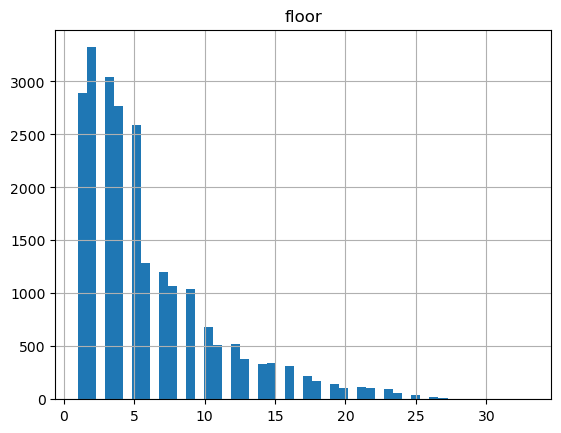

In [59]:
data.hist('floor', bins=50, range=(1, 33)); # строю гистограмму

<br> **kitchen_area** самая маленькая кухня 1,3 метра, самая большая 112, но из графика видно что вариантов более 50 метров очень мало, меньше 4 тоже мало, нужно посчитать

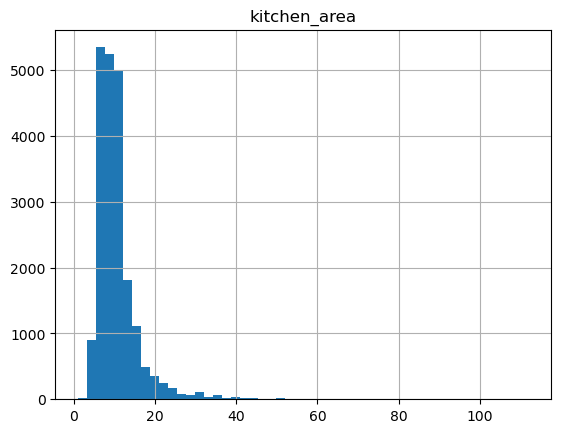

In [60]:
data.hist('kitchen_area', bins=50, range=(1, 112)); # строю гистограмму

In [61]:
print('Квартир с кухней меньше 4 метров включительно:', data.query('kitchen_area <= 4')['kitchen_area'].count())
print('Квартир с кухней более 50 метров включительно:', data.query('kitchen_area >= 50')['kitchen_area'].count())

Квартир с кухней меньше 4 метров включительно: 52
Квартир с кухней более 50 метров включительно: 46


In [62]:
data.drop(index=data.query('kitchen_area <= 4').index,inplace=True) # удаляю квартиры с кухней менее 4 метров
data.drop(index=data.query('kitchen_area >= 50').index,inplace=True)  # удаляю квартиры с кухней более 50 метров

примерно равное количество кухонь менее 4 метров и более 50, конечно такие экстремальные варианты встречаются в реальной жизни, но их не много, из графика видно, что большая часть кухонь имеет размер в диапазоне от 5 до 12 метров. Есть и пиковые значения, скорее всего они относятся к типовым застройкам.

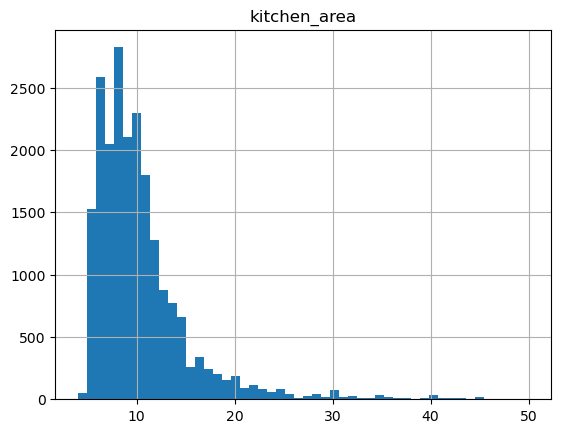

In [63]:
data.hist('kitchen_area', bins=50, range=(4, 50)); # строю гистограмму

<br> **balcony**  - данные выглядят достоверно, ,балконов может не быть совсем, так же часть продавцов их наличие забывают указать (слишком много вариантов с нулевым количеством), что интересно, меньше всего вариантов из имеющихся с 3 балконами

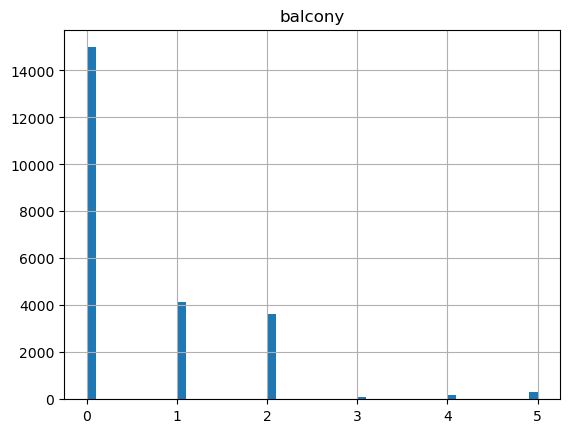

In [65]:
data.hist('balcony', bins=50, range=(0, 5)); # строю гистограмму

Эти данные собираются автоматически, статистика и графики выглядят нормально:
<br>airports_nearest
<br>city_centers_nearest
<br>parks_around3000
<br>parks_nearest
<br>ponds_around3000
<br>ponds_nearest

**airports_nearest** есть одна квартира с нулевым расстоянием, скорее всего она находится на территории аэропорта

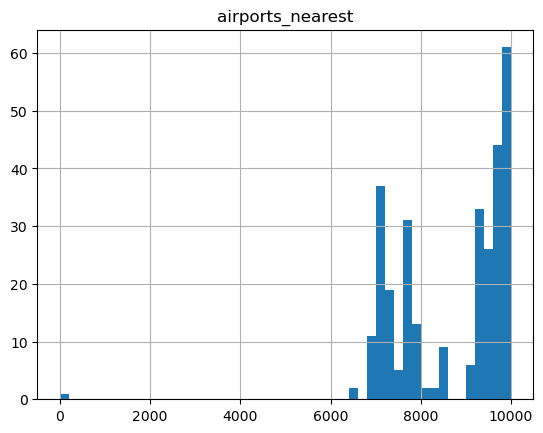

In [66]:
data.hist('airports_nearest', bins=50, range=(0, 10000)); # строю гистограмму

**days_exposition** - сколько дней было размещено объявление видим, есть объявления опубликованые более 2 лет назад.

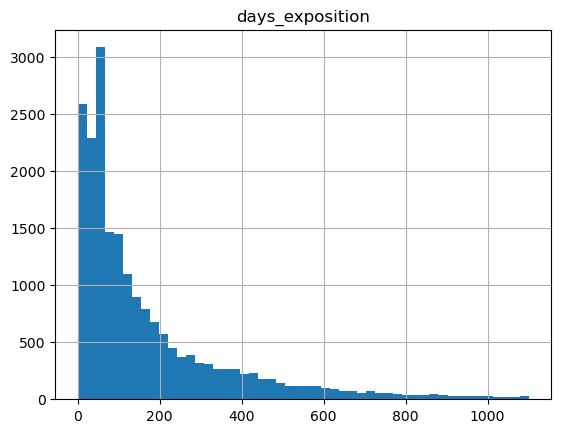

In [67]:
data.hist('days_exposition', bins=50, range=(0, 1100)); # строю гистограмму

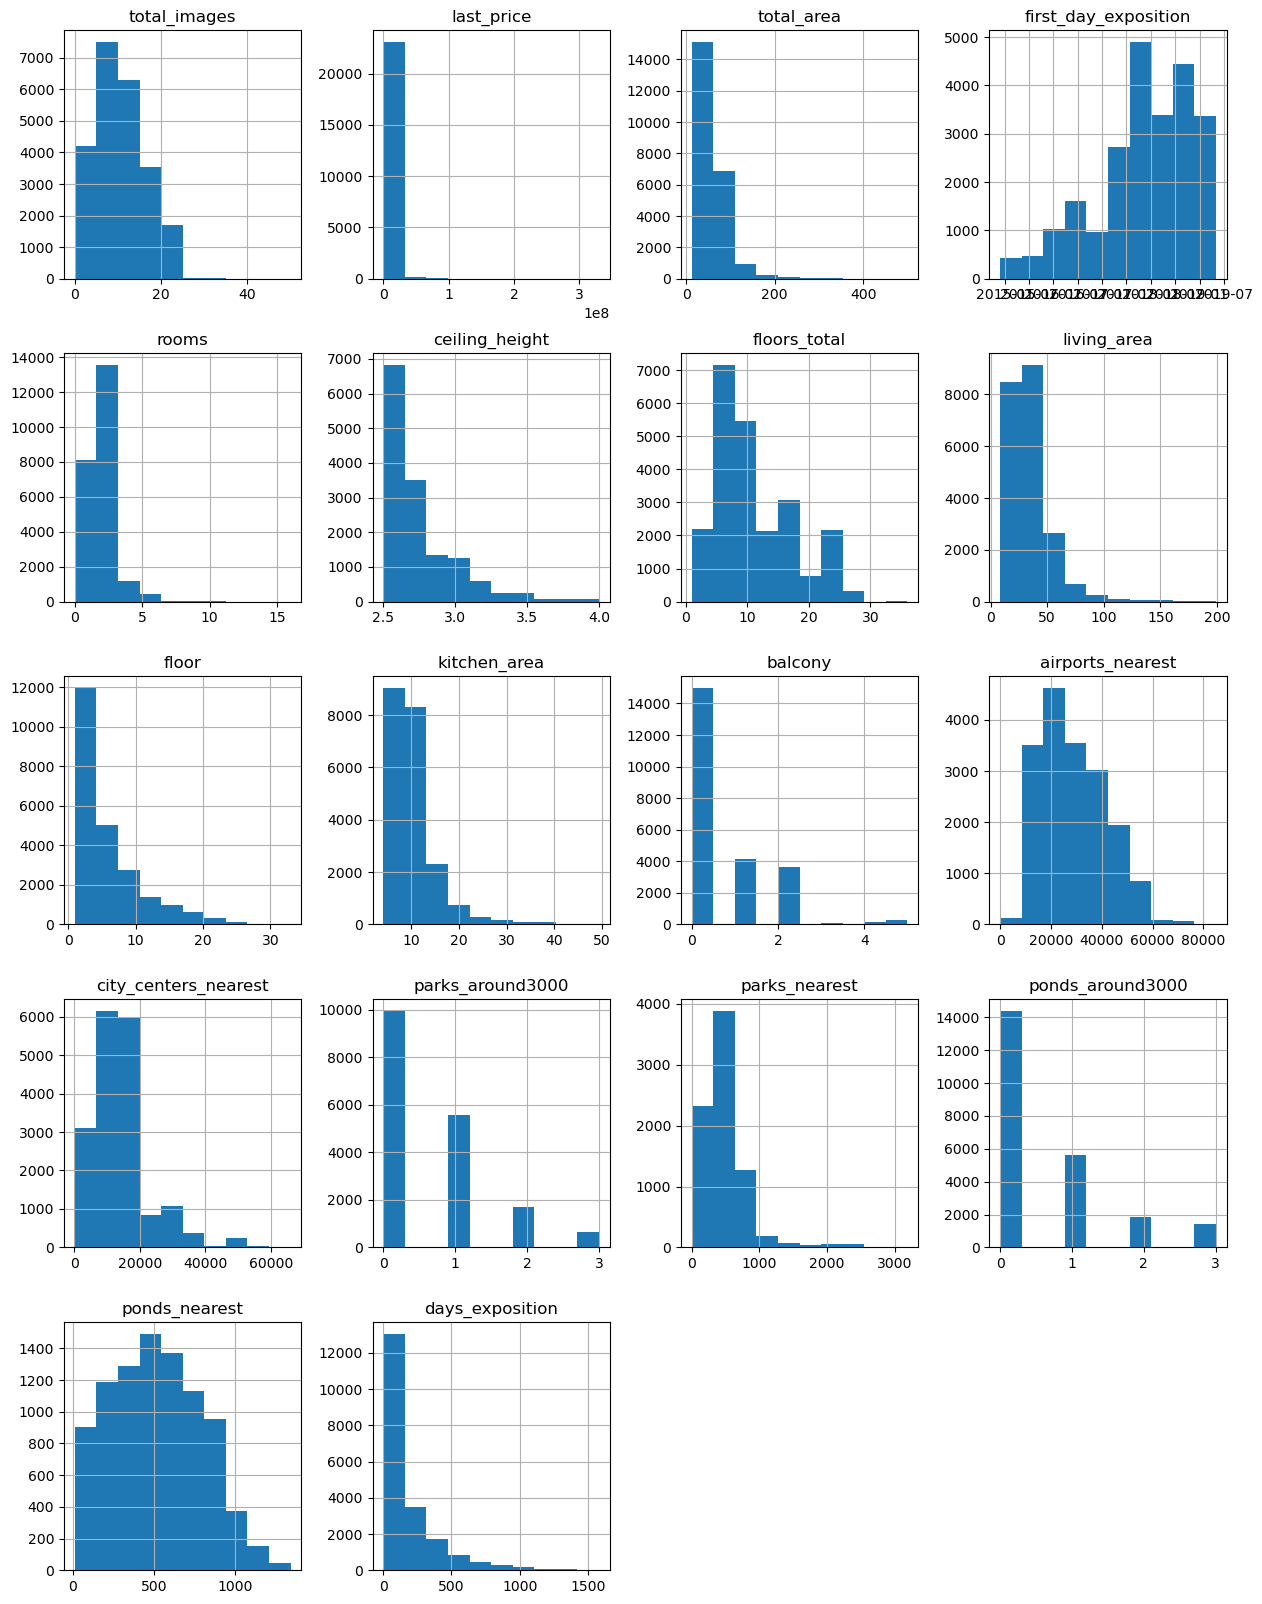

In [68]:
data.hist(figsize=(15, 20)); # смотрю общую гистограмму

### Посчитайте и добавьте в таблицу новые столбцы

In [69]:
data['price_sqm'] = data['last_price'] / data['total_area'] # стоимость одного квадратного метра

In [70]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek # вычисляю в какой день недели было опубликовано объявление

In [71]:
data['month'] = data['first_day_exposition'].dt.month # месяц публикации объявления

In [72]:
data['year'] = data['first_day_exposition'].dt.year # год публикации объявления

In [73]:
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
) # тип этажа квартиры (значения — «первый», «последний», «другой»)

In [74]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000) # расстояние до центра города в километрах (из м в км c округлением до целых значений)

In [75]:
data.head() # проверяем наличие новых столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week,month,year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

In [76]:
data.describe() # посмотрим на данные еще раз и построим гистограммы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week,month,year,city_centers_nearest_km
count,23296.000000,2.329600e+04,23296.000000,23296.000000,14263.000000,23296.000000,21446.000000,23296.000000,21095.000000,23296.000000,17824.000000,17844.000000,17845.000000,7900.000000,23296.000000,8901.000000,20161.000000,2.329600e+04,23296.000000,23296.000000,23296.000000,17844.000000
mean,9.870579,6.269692e+06,59.566878,2.060826,2.720482,10.701451,34.016736,5.885431,10.414968,0.593278,28818.573160,14235.712116,0.607397,491.248354,0.586324,518.850803,180.503398,9.866493e+04,2.568982,6.400369,2017.372081,14.229265
std,5.675827,7.726044e+06,31.733717,1.050615,0.254212,6.584027,19.783920,4.875348,5.124020,0.959433,12652.138852,8598.229357,0.799063,342.589350,0.880750,278.045569,219.595739,4.643499e+04,1.787140,3.492553,1.037871,8.606315
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,8.300000,1.000000,4.100000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9329.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.652059e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.605003e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26798.000000,13138.000000,0.000000,455.000000,0.000000,503.000000,95.000000,9.486673e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.740000e+06,69.220000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37322.750000,16296.000000,1.000000,612.250000,1.000000,731.000000,231.000000,1.139260e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,500.000000,16.000000,4.000000,36.000000,199.000000,33.000000,49.400000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


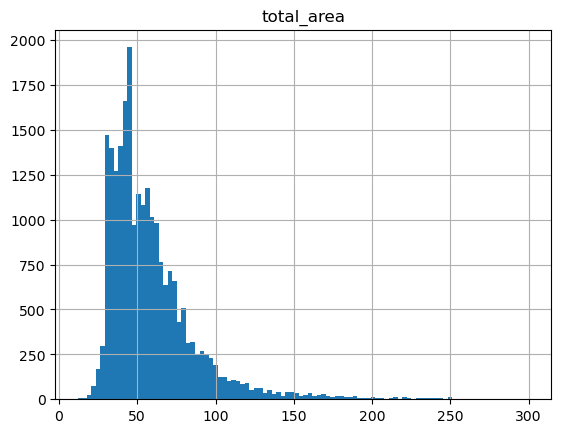

In [77]:
data.hist('total_area', bins=100, range=(12, 300)); # общая площадь

Из графика видно, что больше всего продаваемых объектов лежат в диапазоне от 20 до 100 квадратных метров. Пик приходится на объекты площадью 30-45 квадратов. Как правило такую площать имеют квартиры с 1-2 комнатами. На графике с количеством комнат можно увидеть харрактерный пик. Квартиры площадью более 150-200 метров редко востребованы, и меют высокую стоимость за счет метража.

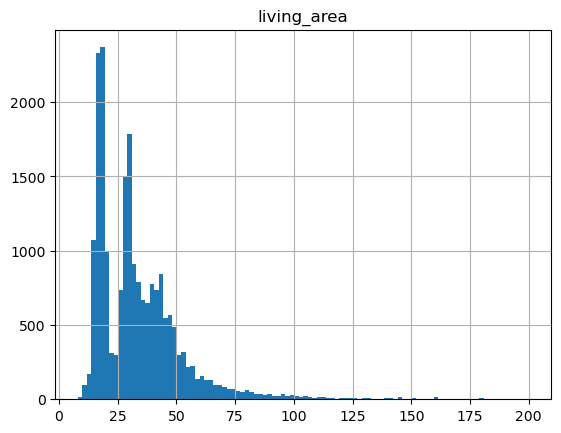

In [78]:
data.hist('living_area', bins=100, range=(8, 200)); # жилая площадь

Распределение жилой площади смещено относительно общей площади влево по оси х, это логично, жилая площадь всегда меньше общей. На графике есть отрицательный экстремум, которого нет на графике с общей площадью, скорее всего он объясняется особенностью планировок (возможно это как раз отличие однокомнатных квартир от двухкомнатных).

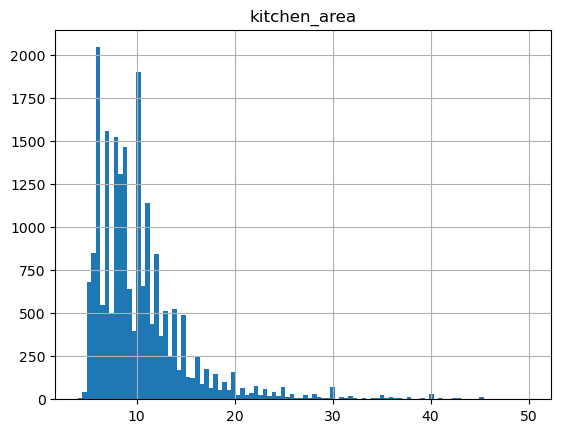

In [79]:
data.hist('kitchen_area', bins=100, range=(4, 50)); # площадь кухни

Кухни как правило небольшие, до 20 метров. Наиболее распространенный размер 6-12. 6-8 метров это площадь в хрущевках, 10-12 домах с улучшеной планировкой. Подобных домов очень много, чем и объясняется пик.

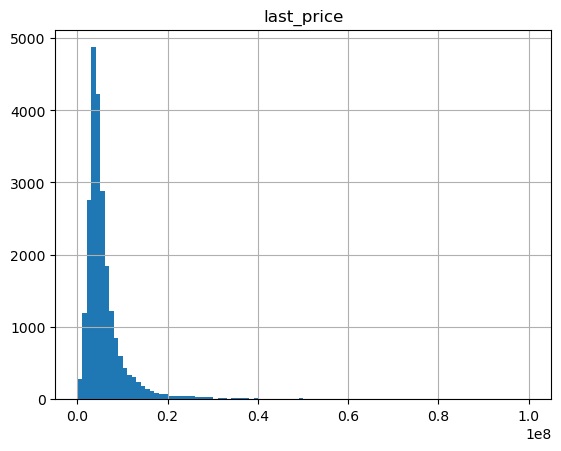

In [80]:
data.hist('last_price', bins=100, range=(100000, 100000000)); # цена объекта

Стоимость квартир редко превышает 20 млн рублей, объектов дешевле 500 тысяч практически нет (несколько вариантов в деревнях).

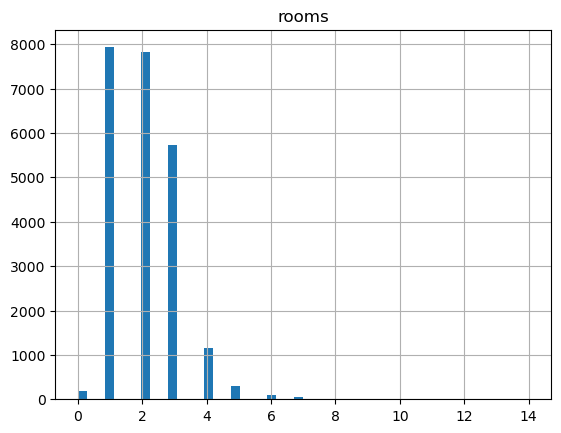

In [81]:
data.hist('rooms', bins=50, range=(0, 14)); # количество комнат

Больше всего 1 и 2 комнатных квартир, трехкомнатных уже меньше. 4 комнатных порядка 5% выборки, остальные варианты мало представлены. Есть варианты без комнат - это студии, апартаменты, свободные планировки.

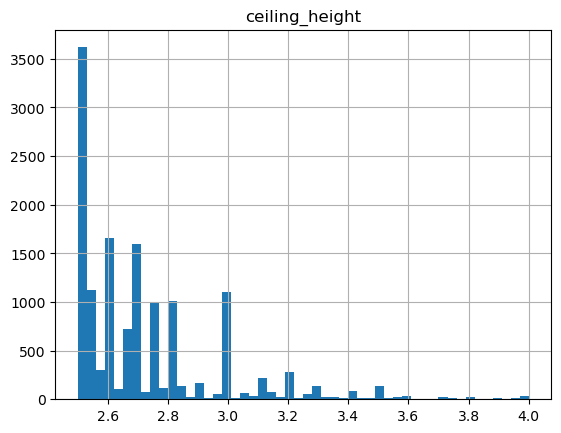

In [82]:
data.hist('ceiling_height', bins=50, range=(2.5, 4)); # высота потолков

данные по потолкам были очищены от значений менее 2,5 метров как не соответствующие строительным нормам, варианты с высотой свыше 4 метров так же признаны сомнительными для жилой недвижимости. Больше всего вариантов от 2,5 до 2,8. Варианты с высотой более 3 метров встречаются редко. потолки 2,5-2,6 это как правило хрущевки из графика видно что таких вариантов очень много

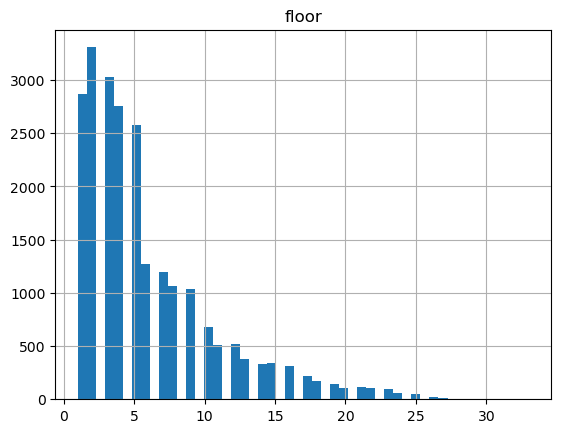

In [83]:
data.hist('floor', bins=50, range=(1, 33)); # этаж квартиры

Больше всего квартир продается на 1-5 этажах, после 25 этажа количество вариантов уже не очень существенно. Чем больше этажность здания, тем реже она встречается.

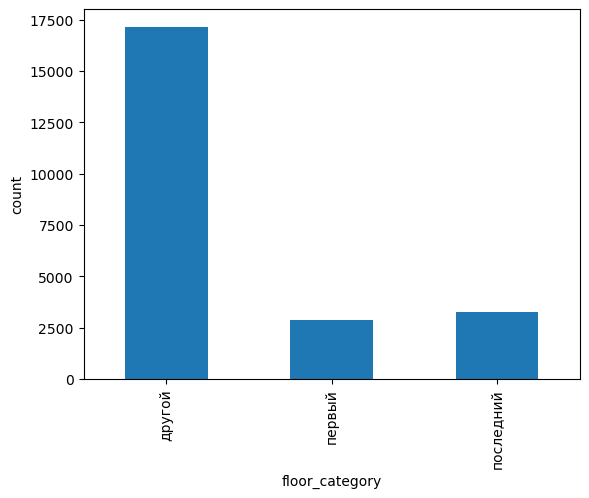

In [84]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count'); # тип этажа квартиры («первый», «последний», «другой»)

Логичная картина, объектов на первых и последних этажах продается существенно меньше чем на всех остальных, при этом последних больше чем первых. Во многих городах первые этажи заняты коммерческой недвижимостью. 

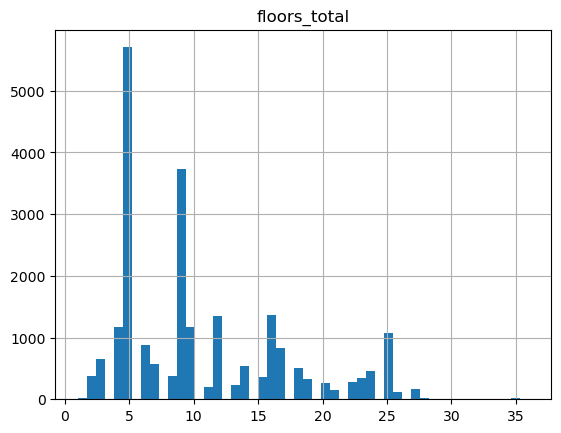

In [85]:
data.hist('floors_total', bins=50, range=(1, 36)); # общее количество этажей в доме

Общее количество этажей в доме обусловлено характером застройки населенного пункта, можно увидеть что в выборке мало одноэтажных строений, зато видны явные пики на 5 и 9 этажах

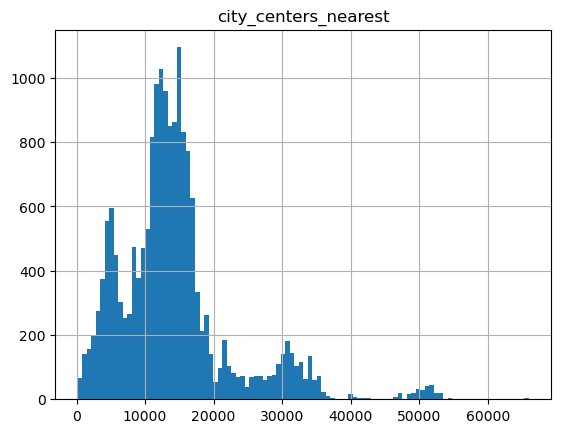

In [86]:
data.hist('city_centers_nearest', bins=100); # расстояние до центра города в метрах

На графике видно несколько пиков, вероятно они обусловлены расположениями спальных раонов относительно центра Санкт-Петербурга, после 35 км пиков практически нет, то есть большая часть города расположена компактно. Небольшие пики 40 и 50 км появились вероятнее всего из-за протяженности города с северо-запада на юго-восток путем присоединения городов-спутников

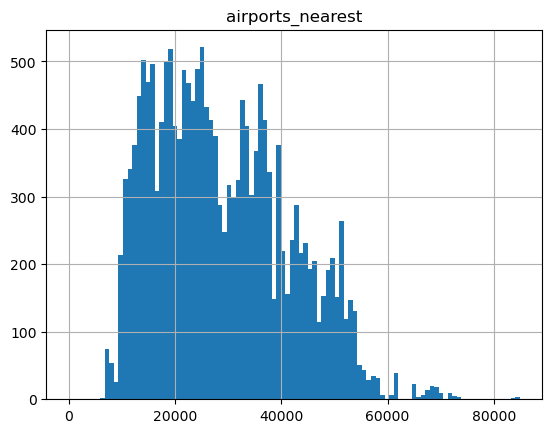

In [87]:
data.hist('airports_nearest', bins=100); # расстояние до ближайшего аэропорта

похоже расстояниение измерялось только до Пулково, аэропорт лежит на юге от города, соответственно график получился достаточно плотный и пики выражены намного слабее чем на графике с удаленностью от центра. Возле самого аэропорта расположены сады и нежилые строения.

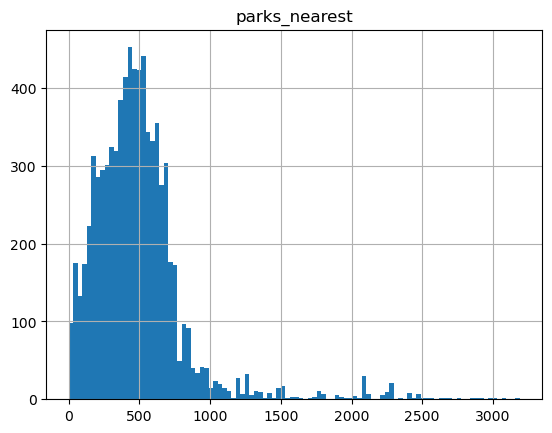

In [88]:
data.hist('parks_nearest', bins=100); # расстояние до ближайшего парка

Судя по графику, парки в городе расположены более-менее равномерно и покупая жилье можно надеятся что в пешей доступности (до 1000 км) будет зеленая зона.

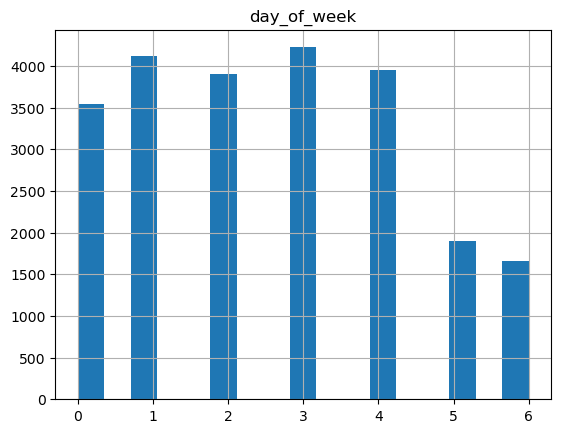

In [89]:
data.hist('day_of_week', bins=17); # день публикации объявления

Как это не странно, но объявления публикуют в основном в будни, больше всего во вторник и четверг. В субботу и воскресенья люди предпочитают отдыхать, возможно большую часть публикуют риэлторы, поэтому активность в субботу и воскресенье низкая

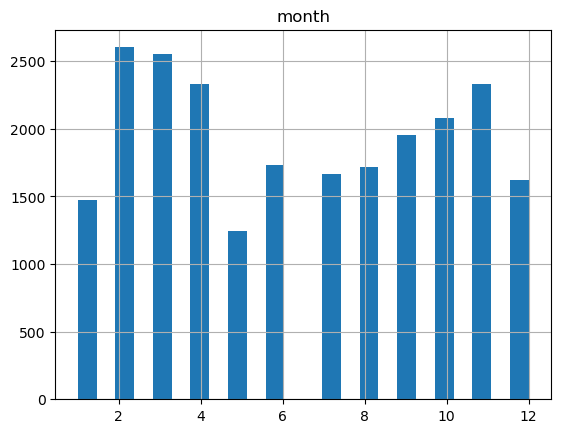

In [90]:
data.hist('month', bins=24); # месяц публикации объявления

В месяцах так же наблюдаются периоды активности и спада. Традиционно спад виден летом в период отпусков, в "ленивые" месяцы январь и май, когда больше всего праздничных дней и декабрь, скорее всего это связано с рабочей загруженностью декабря, "закрытием" года, фокус внимания смещается.

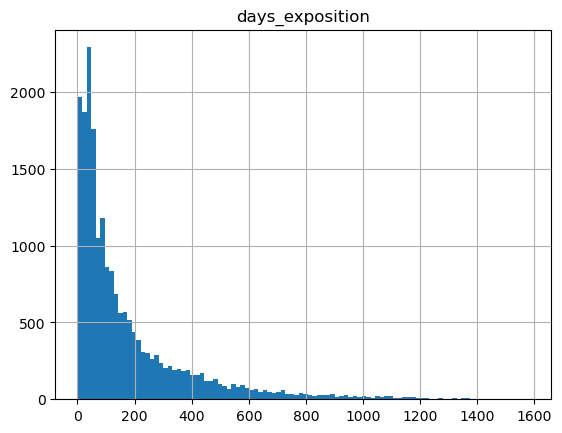

In [91]:
data.hist('days_exposition', bins=100); # график распределения по дням экспозиции

In [92]:
data['days_exposition'].describe() # посмотрим статистику по срокам размещения

count    20161.000000
mean       180.503398
std        219.595739
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [93]:
data.loc[(data['rooms'] == 1), 'days_exposition'].median() # медиана для размещения однокомнатных квартир

81.0

In [94]:
data.loc[(data['rooms'] == 2), 'days_exposition'].median() # медиана для размещения двухкомнатных квартир

91.0

In [95]:
data.loc[(data['rooms'] == 3), 'days_exposition'].median() # медиана для размещения трехкомнатных квартир

114.0

In [96]:
data.loc[(data['rooms'] == 4), 'days_exposition'].median() # медиана для размещения четырехкомнатных квартир

155.0

Среднее время продажи квартиры составляет 166 дней, медианное 93. Это говорит о том, что в выборке еще достаточно "долгих" объявлений, смещающих среднее. Даже с учетом того, что объявления свыше 1000 дней исключены. Быстрыми можно считать продажи в 25% процентиле 44 дня и  менее. Медленными все что дольше 220. А еще можно увидеть как растет медианное время продаж с увеличением количества комнат в квартире. Одно и двух комнатные квартиры продаются быстрее "рынка в целом", 3 комнатные и более медленнее. 

In [97]:
data['floor_category_num']=data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
) # назначим цифровые обозначения для категорий

In [98]:
factors_impact = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_num']
for factors in factors_impact:
    correlation = data['last_price'].corr(data[factors])
    print(f'Корреляция между last_price и {factors} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 68.49%
Корреляция между last_price и living_area составляет: 59.35%
Корреляция между last_price и kitchen_area составляет: 48.68%
Корреляция между last_price и rooms составляет: 39.55%
Корреляция между last_price и floor_category_num составляет: 5.25%


Зависимость между ценой продажи и любой составляющей даты публикации если и есть, то не линейная. Корреляция между ценой продажи и количеством комнат и площадью кухни средняя.

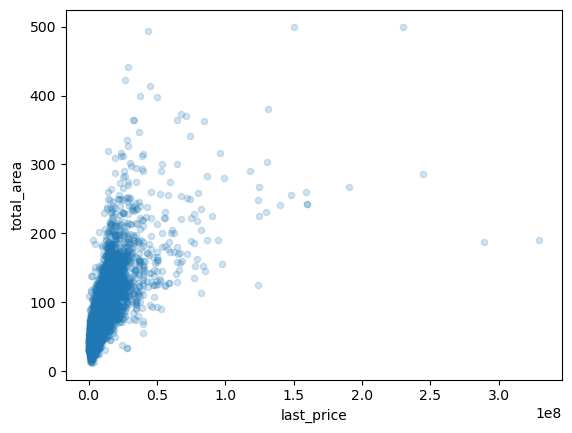

In [99]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2); # построим график корреляции

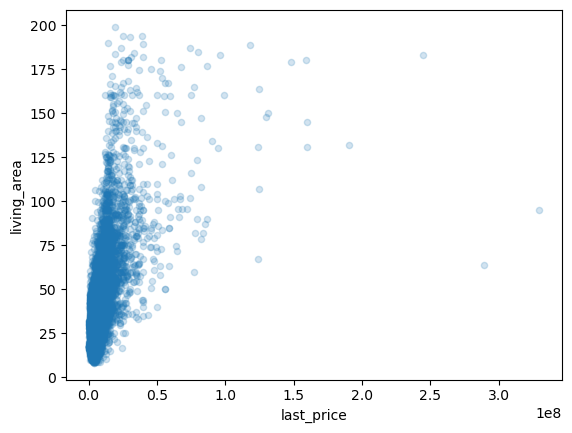

In [100]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2); # построим график корреляции

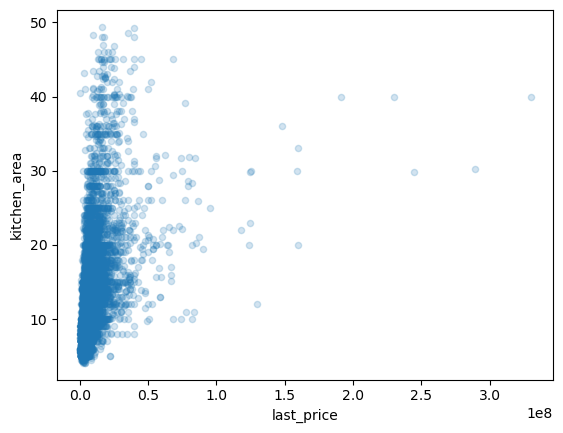

In [101]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2); # построим график корреляции

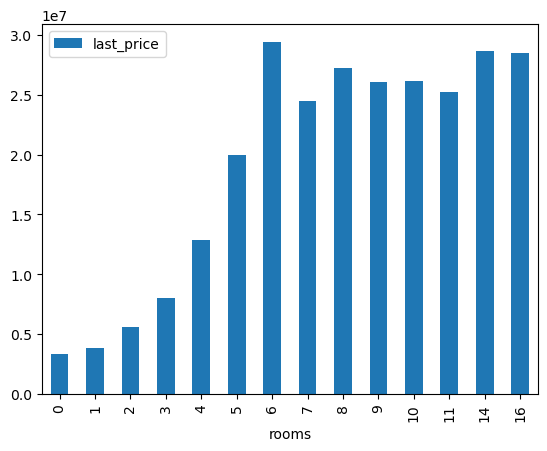

In [102]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar'); # построим график зависимости цены от количества комнат

Видно что самая сильная корреляция между ценой и обшей площадью, хотя конечно общая площадь это далеко не единственный фактор влияющий на цену, поэтому и корреляция не 100%. Далее по убыванию зависимости идет жилая площадь, что логично, так как она в большей степени зависит от общей площади, но не на 100% опять же. Слабее всего на стоимость влияет площадь кухни и количество комнат, но и у данных факторов есть зависимость от общей плащади, хотя и не абсолютная. Рекомендации по увеличению кухни в зависимости от количества комнат заложены в строительные СНИПы, при увеличении количества комнат как правило увеличевается количество жилой и общей площади, но есть и специальные проекты с увеличенной жилой площадью без увеличения количества комнат, так же другие факторы, как ремонт и особое положение объекта, которые оказывают влияние на стоимость.

**Посмотрим как менялась цена в зависимости от этажа и дня недели/месяца/года**

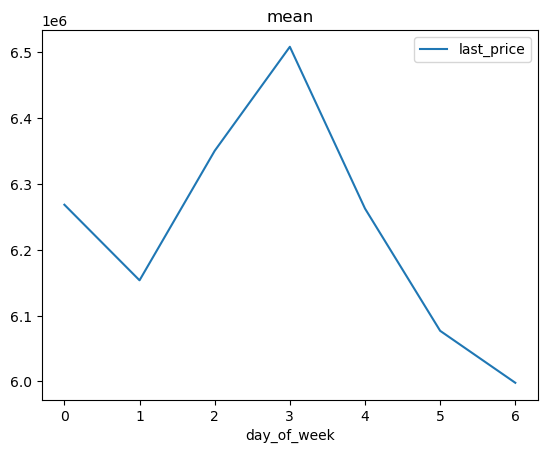

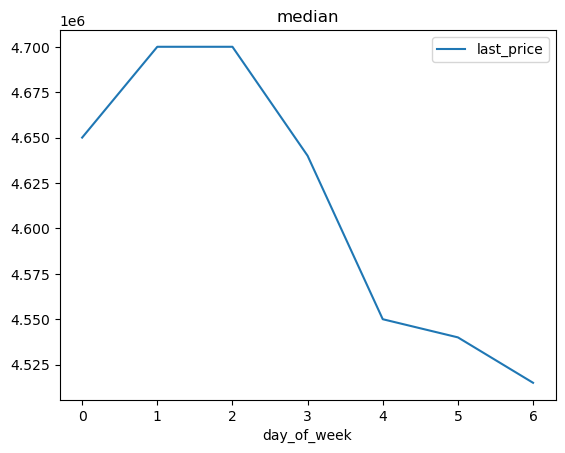

In [103]:
data.pivot_table(index='day_of_week',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='day_of_week',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

На графике заметна зависимость цены продажи от дня публикации, такое ощущение, что если люди публиковали объявление в дни, когда публиковалось меньше всего объявлений суббота и воскресенье), то они были готовы продавать квартиру дешевле. При этом отличия в графиках по средней и медиане говорят о том что при публикации квартир во буднии дни происходит большой разброс по цене, то есть публикуется много нестандартных вариантов. 

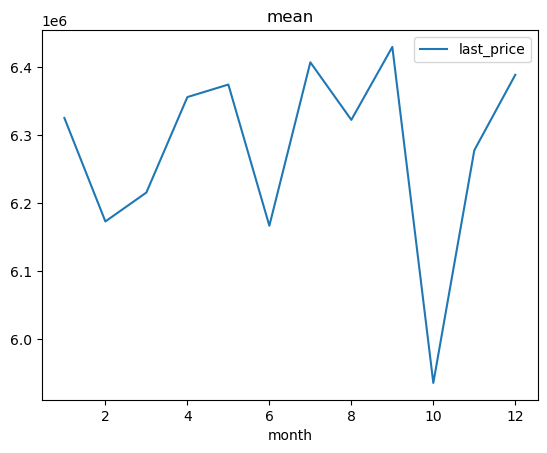

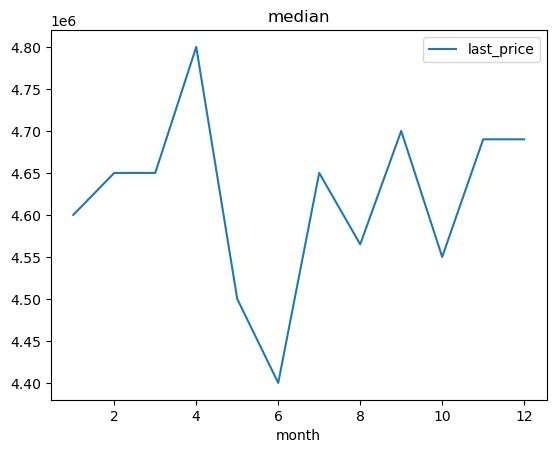

In [104]:
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Очень интересную картину показывает график построенный по медиане, он очень похож на график по количеству публикаций в зависимости от месяца, видны спады в январе и декабре, и с мая по август. Правда есть существенный спад в октябре, который с графиком публикаций не совпадает, особенно он заметен на граыике со средними значениями. 

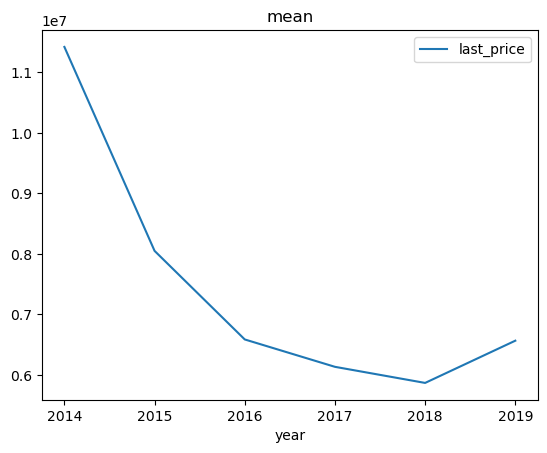

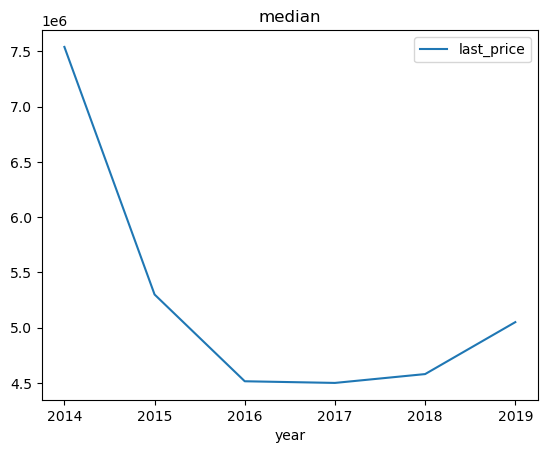

In [105]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

График изменения стоимости недвижимости по годам показывает колебания рынка, видно что средняя и медианная стоимость квартир после кризиса 2014 года существенно упала и начала восстанавливаться только в 2018 году

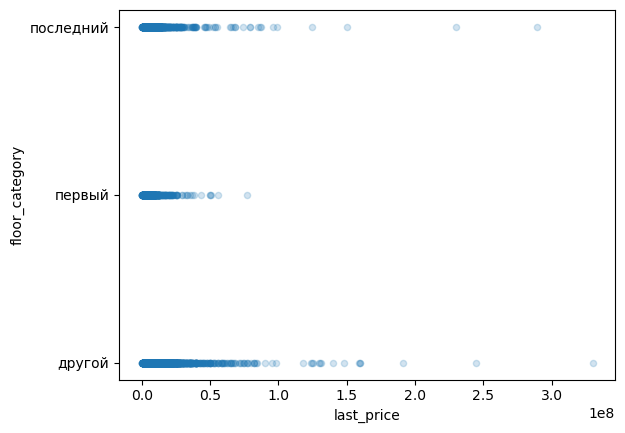

In [106]:
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.2);

Из графика видно что основная масса продавцов склонна давать небольшой дисконт продавая квартиры на первом и последнем этажах, при этом при продаже первых этажей дисконт чуть больше. В целом квартиры первых этажей продаются дешевле.

**Посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [107]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count']) # соберем сводную таблицу

In [108]:
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count'] # переименую столбцы
top_10.drop(['total_area_count'], axis=1).head() # удалю лишний

,last_price_sum,total_area_sum,last_price_count
locality_name,,,
бокситогорск,12989000,740.20,15
волосово,71200000,1806.65,36
волхов,191569900,5467.80,110
всеволожск,1502648965,22208.03,396
выборг,758083000,13089.56,233


In [109]:
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10] # сортирую по убыванию количества объявлений и беру 10 верхних строк

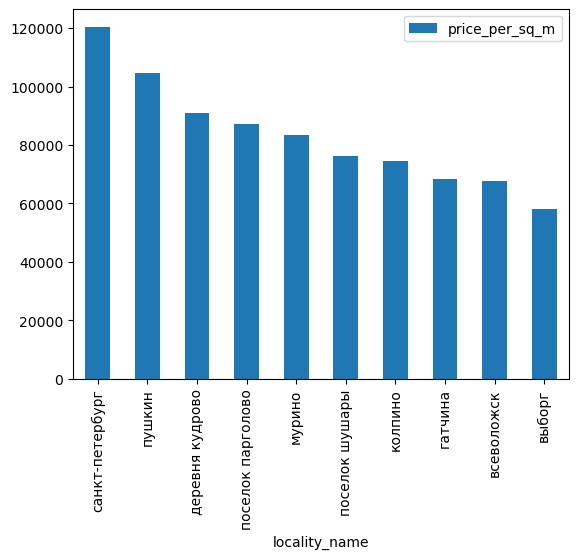

In [110]:
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by='price_per_sq_m', ascending=False).plot(y='price_per_sq_m', kind='bar'); # считаю стоимость квадратного метра и сортирую по его убыванию

Из топ-10 по количеству объявлений самый дорогой квадратный метр жилой недвижимости ожидаемо оказался в Санкт-Петербурге, за ним с небольшим отрывом следует Пушкин. Самая низкая стоимость недвижимости в Выборге, скорее всего это из-за удаленности от Санкт-Петербурга.

**Вычисляю стоимость каждого км от центра Санкт-Петербурга**

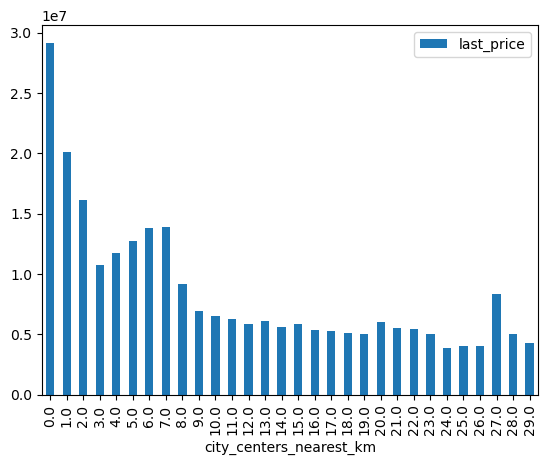

In [112]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_nearest_km',values='last_price',aggfunc='mean').plot(kind='bar');
# выбираю из таблицы только локацию санкт-петербург и строю сводную таблицу по удаленности от центра, сразу визуализирую

Из графика видно, что самая дорогая недвижимость находится в центре города, на расстоянии до 1 км, далее виден небольшой пик на расстоянии 6-7 км и затем еще один явный пик на расстоянии 27 км (возможно локация с элитной недвижимостью). В целом наблюдается тренд на снижение стоимости по мере удаления от центра.

### Общий вывод

 **Для анализа были получены данные со значительным количеством пропусков, тем не менее для целей анализа этих данных оказалось вполне достаточно. Из датафрейма были исключены явные выбросы и исправлены явные ошибки, остальные данные использовались для анализа без изменений.
<br> В ходе анализа обнаружена достаточно сильная зависимость стоимости квартиры от ее общей площади, тем не менее эта зависимость не 100%, так как на стоимость квартиры влияют и другие независимые от общей площади факторы. Например в Санкт-Петербурге обнаружена зависимости стоимости от расстояния от центра. А так же зависимость стоимости от населенного пункта, еслы бы у меня были данные о состоянии квартиры (ремонта, его свежести и уровня), скорее всего удалось бы обнаружить и зависимость от состояния. Кроме того есть небольшая зависимость стоимости объекта от этажа на котором он расположен, так квартиры на первом и последнем этаже имеют небольшой дисконт, при этом дисконт квартир на первом этаже больше чем на последнем. 
<br> В ТОП-10 рекордсменами по стоимости жилья оказались: Санкт-Петербург и ближайшие город Пушкин, д. Кудрово. Стоимость недвижимости меняется со временем, есть зависимость по годам, скачки цен в зависимости от месяца подачи и даже дня недели в котором подано объявление. Так объекты размещенные в сб и вс продаются в целом дешевле.
<br> Медианное время продажи объявление составляет 93 дня, в данном исследовании вообще лучше пользоваться медианой, так как в выборке есть достаточно объявлений висящих годами, скорее всего это объявления для завлекания клиентов (вывбирается качественный и ликвидный объект, после звонка клиента по объявлению ему сообщают что объект уже зарезервирован, но в агентстве есть похожие) и к продаже объекта отношения не имеют. Быстрыми можно считать продажи в 25 процентиле 44 дня и менее. Медленными все что дольше 220 дней. А еще можно увидеть как растет медианное время размещения с увеличением количества комнат в квартире. Одно и двух комнатные квартиры продаются быстрее "рынка в целом", 3 комнатные и более медленнее.**